## 📘 Introduction: Volatility Forecasting and Forecasted Return Intervals

Volatility forecasting is a core element of modern risk management and investment strategy.  
By modeling how market volatility evolves over time — especially using advanced models like **GARCH** and **EGARCH** — investors can anticipate future market uncertainty, rather than simply reacting to it.

### 🔍 What Volatility Forecasting Does
Volatility forecasting estimates the **expected variability of returns** over a future period (e.g., next 30 days).  
It captures how shocks, news, and market sentiment impact future risk levels, providing a dynamic view of market stability or turbulence.

These forecasts are derived from conditional heteroskedastic models (ARCH-type models), which account for:
- **Volatility clustering** – calm and stormy periods in returns.
- **Leverage effects** – volatility rising more after negative returns.
- **Fat tails** – higher probability of extreme moves than predicted by normal theory.

By projecting these dynamics, investors gain a forward-looking measure of **market risk intensity**.

---

### 📈 Forecasted Return Intervals

In parallel, **forecasted return intervals** quantify the range within which daily returns are likely to fall with a given confidence level — often 95%.  
This range reflects the **expected magnitude of daily market movements**, allowing investors to gauge both typical and extreme return outcomes.

For example:
- A **95% return interval** of ±1.5% means that on most trading days, returns are expected within that range.
- If volatility forecasts rise, this interval widens — signaling increasing uncertainty and downside risk.

---

### 💡 How This Assists in Investment Decision-Making

Volatility and return interval forecasts play a direct role in shaping **portfolio and trading decisions**:

| Insight | Investment Application |
|:---------|:-----------------------|
| **Rising forecasted volatility** | Reduce leverage, tighten stop-losses, or increase hedging exposure. |
| **Stable or declining volatility** | Favor carry trades, mean-reversion strategies, or higher-risk equity allocations. |
| **Wide 95% return interval** | Expect larger daily swings → manage position sizing accordingly. |
| **Asymmetric volatility (EGARCH)** | Adjust exposure — markets react more sharply to bad news than good. |
| **Fat-tail risk (t-distribution)** | Use robust VaR, stress tests, and tail-hedging strategies. |

---

### 🧭 In Summary
Volatility forecasts and forecasted return intervals translate complex market dynamics into **actionable insights**.  
They enable investors to:
- Anticipate risk regimes rather than react to them,
- Align portfolio volatility with risk tolerance,
- Optimize entry and exit timing, and
- Design resilient, volatility-aware investment strategies.

In essence, these models turn statistical forecasts into **strategic foresight** — guiding investors toward better-informed, data-driven decisions.


In [1]:
!pip install arch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 10.0 MB/s eta 0:00:00


In [3]:
"""
GARCH / EGARCH (and optional ARCH) 30-day volatility forecasting with CI.

Requirements:
    pip install yfinance pandas numpy matplotlib scipy arch

Run in local Python or Colab.
"""
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf
from arch import arch_model
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8-darkgrid')  # feel free to change

# 📘 GARCH(1,1) & EGARCH(1,1) 30-Day Volatility Forecasting Framework

---

## 🧩 Overview

This workflow:

✅ Loads **adjusted-close price data** from Yahoo Finance for a list of tickers (default: `^NSEI` — NIFTY 50).  
✅ Computes **daily log returns**.  
✅ Fits **GARCH(1,1)** and **EGARCH(1,1)** models for each ticker (optionally includes **ARCH(1)** if `include_arch=True`).  
✅ Produces **30-day volatility forecasts** from the fitted models.  
✅ Performs a **Monte Carlo simulation** (if supported) to generate forecast confidence intervals.  
If simulation is unavailable, the script **falls back to an analytic approximation** using Normal or Student-t quantiles, with the fallback method reported.

---

## 📊 What You’ll See

### Plot 1 – Volatility Forecast Comparison
- **Black line:** Last 250 days of historical conditional σ.  
- **Colored lines:** Each model’s 30-day σ forecast path.  
  → Reveals which model predicts more or less **persistent volatility**.

### Plot 2 – Return Forecast Intervals
- **Lines:** Each model’s mean daily return (μ).  
- **Shaded bands:** ±95% forecast return range (wider for t-distributions, reflecting **fat-tail uncertainty**).

---

## 📋 Summary Table (Below Each Ticker’s Plots)

| Metric | Description |
|:--------|:-------------|
| **Mean forecast volatility** | Average of 30-day σ forecast |
| **Max forecast volatility** | Peak volatility in forecast horizon |
| **Forecast 95% return band width** | Typical expected ±95% range of daily returns |
| **Implied daily VaR (95%)** | One-day 95% Value-at-Risk |
| **Distribution** | Normal or Student-t |
| **AIC / BIC** | Model fit quality (lower = better) |

---

## 🧠 Quick Interpretation Guide

| **Observation** | **Interpretation** |
|:------------------|:------------------|
| EGARCH line higher after shocks | Capturing **leverage effect** – volatility rises more after negative returns. |
| t-models’ bands wider | **Fat-tail modeling** → more conservative risk forecast. |
| Narrower σ forecast | Indicates **mean reversion**, volatility clustering fading. |
| Overlapping vs diverging bands | Confidence in volatility outlook; divergence → model disagreement. |

---

## 🧩 What This Does

✅ **Volatility Plot** – Compares all models’ σ forecasts  
✅ **Return Interval Plot** – Shows expected μ ±95% range per model  
✅ **Summary Table** – Highlights key forecast metrics  

| **Column** | **Meaning** |
|:------------|:------------|
| Mean σ (%) | Average forecasted volatility (30 days) |
| Max σ (%) | Peak volatility in forecast window |
| 95% Return Range Width (%) | ±95% expected return range |
| VaR₉₅ (%) | One-day Value-at-Risk (95%) |
| AIC / BIC | Model fit quality (lower = better) |

✅ **Best model automatically highlighted** using lowest AIC & BIC.

---

## 💡 Example Interpretation

| **Model** | **Mean σ** | **VaR(95%)** | **Comment** |
|:------------|:------------|:--------------|:-------------|
| GARCH(1,1)-t | 1.25% | -2.5% | Strong volatility persistence, fat tails → conservative risk. |
| EGARCH(1,1)-norm | 1.10% | -2.1% | Captures leverage; faster mean reversion. |
| ARCH(1)-t | 1.45% | -2.9% | Overreacts to recent shocks, less stable. |

**Investor Insight:**  
If EGARCH-t yields lowest AIC/BIC and moderate volatility, it implies **asymmetric reactions** — typical in equities where bad news drives volatility spikes.  
If GARCH-t dominates, volatility clustering is symmetric but **fat-tailed**, indicating sustained but balanced risk.

---


TICKER: ^NSEI
 Fitting GARCH(1,1)-t (t) ... done.
 Fitting GARCH(1,1)-norm (normal) ... done.
 Fitting EGARCH(1,1)-t (t) ... done.
 Fitting EGARCH(1,1)-norm (normal) ... done.


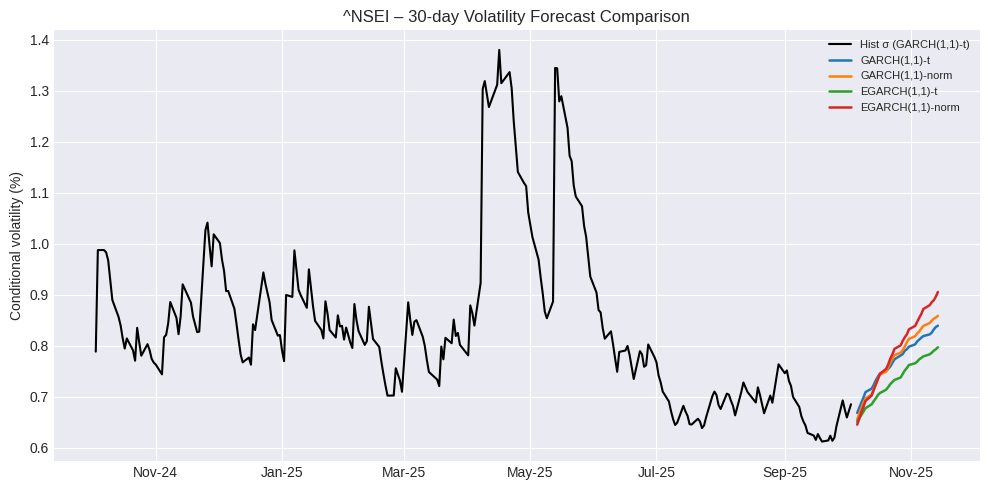

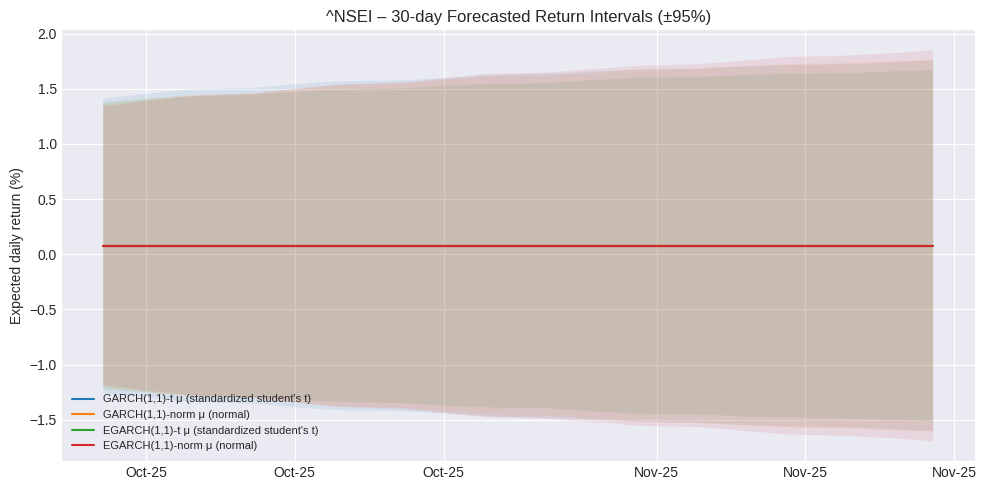


=== Model Forecast Summary (Next 30 Days) ===
           Model             Distribution  Mean σ(%)  Max σ(%)  95% Return Range Width(%)  VaR_95(%)       AIC       BIC
   EGARCH(1,1)-t standardized student's t     0.7332    0.7972                     2.9307    -1.4653 6697.8694 6727.2753
    GARCH(1,1)-t standardized student's t     0.7690    0.8394                     3.0736    -1.5368 6699.0810 6728.4869
 GARCH(1,1)-norm                   normal     0.7748    0.8588                     3.0372    -1.5186 6836.0313 6859.5561
EGARCH(1,1)-norm                   normal     0.7884    0.9056                     3.0903    -1.5451 6844.6073 6868.1320

📊 Best model by AIC:  EGARCH(1,1)-t
📈 Best model by BIC:  EGARCH(1,1)-t


In [6]:


# ---------------------------
# User config
# ---------------------------
tickers = ['^NSEI']                # default list; add more tickers as desired
start_date = "2015-01-01"
end_date = "2025-10-05"
include_arch = False               # If True, include ARCH(1) in modeling+forecasting
horizon = 30                       # forecast horizon (days)
mc_sims = 2000                     # Monte Carlo simulations for forecast CI (try keep reasonable)
output_dir = "vol_forecasts_output"
os.makedirs(output_dir, exist_ok=True)

# ---------------------------
# Helper functions
# ---------------------------
def download_adj_close(tickers, start, end):
    data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=False)['Adj Close']
    if isinstance(data, pd.Series):
        data = data.to_frame()
    return data

def compute_returns(adj):
    # log returns in percent (makes small numbers easier to read)
    return np.log(adj / adj.shift(1)).dropna() * 100

def fit_models_and_forecast(r, model_specs, horizon, mc_sims):
    """
    Fit each model in model_specs to return series r (pandas Series).
    model_specs is a list of tuples: (label, vol_type, p, q, dist)
    Returns a dict with keys = label and values = dict with fit object, forecast info.
    """
    out = {}
    for label, vol_type, p, q, dist in model_specs:
        print(f" Fitting {label} ({dist}) ...", end='', flush=True)
        am = arch_model(r, mean='Constant', vol=vol_type, p=p, q=q, dist=dist)
        res = am.fit(disp='off')
        print(" done.")
        # try simulation-based forecast for CI
        try:
            # arch allows forecast(method='simulation', simulations=...) in many versions:
            fcst_sim = res.forecast(horizon=horizon, method='simulation', simulations=mc_sims)
            # fcst_sim.simulations is a dict-like with keys 'variance', 'mean' possibly
            # Extract simulated variance arrays shape: (simulations, horizon)
            sim_variances = None
            if hasattr(fcst_sim, 'simulations') and fcst_sim.simulations is not None:
                # fcst_sim.simulations is a DataFrame/Panel-like object depending on version
                sims = fcst_sim.simulations
                # try to access 'variance'
                if 'variance' in sims:
                    sim_variances = np.array(sims['variance'])  # shape may be (horizon, sims) or (sims, horizon)
                elif hasattr(sims, 'variance'):
                    sim_variances = np.array(sims.variance)
            # fallback: some versions store as fcst_sim._simulated_variances or similar
            if sim_variances is None:
                # Try another attribute
                sim_variances = getattr(fcst_sim, 'simulated_variances', None)
                if sim_variances is not None:
                    sim_variances = np.array(sim_variances)
            if sim_variances is None:
                # As a last fallback, call res.simulate() to generate Monte Carlo paths.
                # res.simulate(params, nobs, repetitions) signature varies; we try to use res.simulate.
                # We will attempt to simulate mc_sims paths of length horizon starting from last obs.
                sim_list = []
                for i in range(int(min(200, mc_sims))):  # limit to 200 quick sims if direct method failing
                    try:
                        s = res.simulate(res.params, nobs=horizon)
                        # s['volatility'] or s['variance'] depending on arch version
                        if 'volatility' in s:
                            sim_list.append(np.array(s['volatility'])**2)
                        elif 'variance' in s:
                            sim_list.append(np.array(s['variance']))
                        else:
                            sim_list.append(np.array(s))
                    except Exception:
                        break
                if len(sim_list) > 0:
                    sim_variances = np.vstack(sim_list)
                else:
                    sim_variances = None

            if sim_variances is not None:
                # Ensure shape is (n_sims, horizon)
                sim_variances = np.atleast_2d(sim_variances)
                if sim_variances.shape[0] != mc_sims:
                    # try transposing if necessary
                    if sim_variances.shape[1] == mc_sims and sim_variances.shape[0] == horizon:
                        sim_variances = sim_variances.T
                # compute mean forecast variance and percentiles
                var_forecast_mean = np.mean(sim_variances, axis=0)
                var_forecast_p5 = np.percentile(sim_variances, 5, axis=0)
                var_forecast_p95 = np.percentile(sim_variances, 95, axis=0)
                # convert to sigma
                sigma_mean = np.sqrt(var_forecast_mean)
                sigma_p5 = np.sqrt(var_forecast_p5)
                sigma_p95 = np.sqrt(var_forecast_p95)
                method_used = 'simulation'
                fcst_result = {
                    'sigma_mean': sigma_mean,
                    'sigma_lower': sigma_p5,
                    'sigma_upper': sigma_p95,
                    'method': method_used,
                    'res': res,
                    'sim_variances': sim_variances
                }
                out[label] = fcst_result
                continue
            else:
                raise Exception("simulation returned no sim_variances")
        except Exception as ex:
            # Simulation-based forecast failed — fallback to analytic forecast
            print(f" (simulation fallback: {str(ex)})", flush=True)

        # Analytic forecast: use res.forecast(horizon=horizon) to get variance forecasts
        try:
            fcst = res.forecast(horizon=horizon, reindex=False)
            # The Forecast object usually has .variance as a dataframe; pick the last row
            # For some versions: fcst.variance.iloc[-1] yields horizon values
            var_row = None
            if hasattr(fcst, 'variance'):
                var_df = fcst.variance
                # If var_df has shape (index,horizon) we pick last
                try:
                    var_row = var_df.iloc[-1].values
                except Exception:
                    # maybe shape (horizon,) already
                    var_row = np.array(var_df)
            else:
                # fallback: fcst may itself be a DataFrame or array
                var_row = np.array(fcst)
            var_row = np.asarray(var_row).reshape(-1)
            # sigma forecast mean
            sigma_mean = np.sqrt(var_row)
        except Exception as ex:
            print(" analytic forecast failed:", ex)
            sigma_mean = np.repeat(res.conditional_volatility[-1], horizon)

        # For analytic CI: approximate using quantiles of standardized residual distribution
        # If model used 't', use t quantiles standardized to unit variance.
        nu = res.params.get('nu', None)
        if res.distribution.name.lower().startswith('t') or (nu is not None and not np.isnan(nu)):
            try:
                df_nu = float(nu)
                # get 5% and 95% quantiles of standardized t (unit variance)
                q_lower = stats.t.ppf(0.05, df_nu) / np.sqrt(df_nu / (df_nu - 2.0))
                q_upper = stats.t.ppf(0.95, df_nu) / np.sqrt(df_nu / (df_nu - 2.0))
                # convert to implied sigma CI by assuming quantile = z * sigma -> sigma = quantile / z
                # This is a rough approximation: we invert z to get sigma bounds for returns, not variance.
                # Instead we approximate sigma CI by scaling sigma_mean by ratio of |q| to z(95%)
                z95 = stats.norm.ppf(0.975)
                # compute multiplicative factors (conservative)
                factor_lower = abs(q_lower) / z95
                factor_upper = abs(q_upper) / z95
                sigma_lower = sigma_mean * factor_lower
                sigma_upper = sigma_mean * factor_upper
            except Exception:
                sigma_lower = sigma_mean * 0.8
                sigma_upper = sigma_mean * 1.2
        else:
            # Normal assumption: approximate symmetric CI by scaling with z quantiles
            z95 = stats.norm.ppf(0.975)
            # approximate sigma CI as +/- 20% of sigma (rough) or use z scaling
            sigma_lower = sigma_mean * 0.8
            sigma_upper = sigma_mean * 1.2

        fcst_result = {
            'sigma_mean': sigma_mean,
            'sigma_lower': sigma_lower,
            'sigma_upper': sigma_upper,
            'method': 'analytic',
            'res': res
        }
        out[label] = fcst_result

    return out

def fit_models_and_forecast(r, model_specs, horizon, mc_sims):
    """
    Fit each model in model_specs to return series r (pandas Series).
    model_specs is a list of tuples: (label, vol_type, p, q, dist)
    Returns a dict with keys = label and values = dict with fit object, forecast info.
    """
    out = {}
    for label, vol_type, p, q, dist in model_specs:
        print(f" Fitting {label} ({dist}) ...", end='', flush=True)
        am = arch_model(r, mean='Constant', vol=vol_type, p=p, q=q, dist=dist)
        res = am.fit(disp='off')
        print(" done.")

        # -----------------------------
        # Try simulation-based forecast
        # -----------------------------
        try:
            fcst_sim = res.forecast(method='simulation', horizon=horizon, simulations=mc_sims)
            sim_obj = getattr(fcst_sim, 'simulations', None)

            # Handle ARCHModelForecastSimulation (newer versions)
            if hasattr(sim_obj, 'variance'):
                sim_variances = np.array(sim_obj.variance)
            elif hasattr(fcst_sim, 'variance'):
                sim_variances = np.array(fcst_sim.variance)
            else:
                sim_variances = None

            if sim_variances is not None:
                sim_variances = np.atleast_2d(sim_variances)
                if sim_variances.shape[0] == horizon:
                    sim_variances = sim_variances.T

                var_mean = np.mean(sim_variances, axis=0)
                var_p5 = np.percentile(sim_variances, 5, axis=0)
                var_p95 = np.percentile(sim_variances, 95, axis=0)

                sigma_mean = np.sqrt(var_mean)
                sigma_p5 = np.sqrt(var_p5)
                sigma_p95 = np.sqrt(var_p95)

                out[label] = {
                    'sigma_mean': sigma_mean,
                    'sigma_lower': sigma_p5,
                    'sigma_upper': sigma_p95,
                    'method': 'simulation',
                    'res': res,
                    'sim_variances': sim_variances
                }
                continue
            else:
                raise ValueError("simulation variance extraction failed")

        except Exception as ex:
            print(f" (simulation fallback: {ex})")

        # -----------------------------
        # Analytic forecast fallback
        # -----------------------------
        fcst = res.forecast(horizon=horizon, reindex=False)
        try:
            var_row = fcst.variance.iloc[-1].values
        except Exception:
            var_row = np.asarray(fcst.variance).reshape(-1)

        sigma_mean = np.sqrt(var_row)

        # --- Extract distribution info safely ---
        try:
            dist_name = res.model.distribution.name.lower()
        except Exception:
            dist_name = dist.lower()

        try:
            nu = res.params.get('nu', np.nan)
        except Exception:
            nu = np.nan

        # -----------------------------
        # Compute confidence intervals
        # -----------------------------
        if dist_name.startswith('t') and nu is not np.nan:
            try:
                df_nu = float(nu)
                q_lower = stats.t.ppf(0.05, df_nu)
                q_upper = stats.t.ppf(0.95, df_nu)
                z95 = stats.norm.ppf(0.975)
                factor_lower = abs(q_lower) / z95
                factor_upper = abs(q_upper) / z95
                sigma_lower = sigma_mean * factor_lower
                sigma_upper = sigma_mean * factor_upper
            except Exception:
                sigma_lower = sigma_mean * 0.8
                sigma_upper = sigma_mean * 1.2
        else:
            sigma_lower = sigma_mean * 0.8
            sigma_upper = sigma_mean * 1.2

        out[label] = {
            'sigma_mean': sigma_mean,
            'sigma_lower': sigma_lower,
            'sigma_upper': sigma_upper,
            'method': 'analytic',
            'res': res
        }

    return out

# ---------------------------
# Build model list for each ticker: include ARCH optionally
# ---------------------------
base_models = []
if include_arch:
    base_models.append(('ARCH(1)-t', 'ARCH', 1, 0, 't'))
    base_models.append(('ARCH(1)-norm', 'ARCH', 1, 0, 'normal'))

# always include GARCH and EGARCH with t and normal
base_models += [
    ('GARCH(1,1)-t', 'GARCH', 1, 1, 't'),
    ('GARCH(1,1)-norm', 'GARCH', 1, 1, 'normal'),
    ('EGARCH(1,1)-t', 'EGARCH', 1, 1, 't'),
    ('EGARCH(1,1)-norm', 'EGARCH', 1, 1, 'normal'),
]

# ---------------------------
# Main loop over tickers
# ---------------------------
adj = download_adj_close(tickers, start_date, end_date)
rets = compute_returns(adj)

# To save the outputs to file:
"""
for ticker in adj.columns:
    print("\n" + "="*80)
    print(f"TICKER: {ticker}")
    r = rets[ticker].dropna()

    # Fit & forecast
    model_specs = base_models.copy()
    # label names already set in base_models
    forecasts = fit_models_and_forecast(r, model_specs, horizon, mc_sims)

    # Historical conditional volatility: pick best model's conditional_volatility for plotting context
    # We'll plot historical conditional vol from GARCH(1,1)-t if available, else first model
    preferred_label = None
    for pref in ['GARCH(1,1)-t', 'GARCH(1,1)-norm', 'EGARCH(1,1)-t', 'EGARCH(1,1)-norm']:
        if pref in forecasts:
            preferred_label = pref
            break
    if preferred_label is None:
        preferred_label = list(forecasts.keys())[0]

    hist_sigma = forecasts[preferred_label]['res'].conditional_volatility  # pandas Series

    # build forecast index
    last_date = r.index[-1]
    # create business-day like index by shifting days (not perfect across holidays)
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=horizon, freq='B')

    # Plot each model's forecast
    for label, fc in forecasts.items():
        sigma_mean = np.asarray(fc['sigma_mean']).reshape(-1)
        sigma_lower = np.asarray(fc['sigma_lower']).reshape(-1)
        sigma_upper = np.asarray(fc['sigma_upper']).reshape(-1)
        method_used = fc.get('method', 'analytic')
        res_obj = fc['res']

        # Compose series for plotting
        hist_dates = hist_sigma.index[-250:]  # show last 250 days for context (approx 1 year)
        fig, ax = plt.subplots(figsize=(10,5))
        # historical sigma (last 250 days)
        ax.plot(hist_dates, hist_sigma.loc[hist_dates], label=f"Historical cond. sigma ({preferred_label})", color='C0')
        # forecast mean line
        ax.plot(forecast_index, sigma_mean, label=f"{label} forecast mean ({method_used})", color='C1')
        ax.fill_between(forecast_index, sigma_lower, sigma_upper, color='C1', alpha=0.25,
                        label=f"{label} 90% CI ({method_used})")
        ax.set_title(f"{ticker} — Volatility Forecast (30 days) — Model: {label}")
        ax.set_ylabel("Conditional volatility (percent)")
        ax.set_xlabel("Date")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plot_path = os.path.join(output_dir, f"{ticker}_{label.replace('/', '_')}_vol_forecast.png")
        fig.savefig(plot_path, dpi=150)
        plt.close(fig)
        print(f" Saved plot: {plot_path}")

        # Save forecast numbers to CSV
        df_fc = pd.DataFrame({
            'date': forecast_index,
            'sigma_mean': sigma_mean,
            'sigma_lower': sigma_lower,
            'sigma_upper': sigma_upper,
            'method': method_used,
            'model_label': label
        })
        csv_path = os.path.join(output_dir, f"{ticker}_{label.replace('/', '_')}_vol_forecast.csv")
        df_fc.to_csv(csv_path, index=False)
        print(f" Saved CSV: {csv_path}")

print("\nAll forecasts and plots saved to:", output_dir)
"""

for ticker in adj.columns:
    print("\n" + "="*100)
    print(f"TICKER: {ticker}")
    r = rets[ticker].dropna()

    model_specs = base_models.copy()
    forecasts = fit_models_and_forecast(r, model_specs, horizon, mc_sims)

    # Pick historical sigma for context
    preferred_label = None
    for pref in ['GARCH(1,1)-t', 'GARCH(1,1)-norm', 'EGARCH(1,1)-t', 'EGARCH(1,1)-norm']:
        if pref in forecasts:
            preferred_label = pref
            break
    if preferred_label is None:
        preferred_label = list(forecasts.keys())[0]

    hist_sigma = forecasts[preferred_label]['res'].conditional_volatility
    hist_dates = hist_sigma.index[-250:]
    last_date = r.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=horizon, freq='B')
    last_mu = forecasts[preferred_label]['res'].params.get('mu', 0)

    # ---- Helper to get t or normal quantile ----
    def get_quantile_factors(res):
        try:
            dist_name = res.model.distribution.name.lower()
        except Exception:
            dist_name = "normal"
        if "t" in dist_name:
            nu = float(res.params.get('nu', 6))
            q95 = stats.t.ppf(0.975, nu)
            z95_eff = q95 / np.sqrt(nu / (nu - 2))
        else:
            z95_eff = stats.norm.ppf(0.975)
        return z95_eff, dist_name

    # =======================================
    # 1️⃣ Combined Volatility Forecast Plot
    # =======================================
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(hist_dates, hist_sigma.loc[hist_dates], label=f"Hist σ ({preferred_label})", color='black', lw=1.5)

    for label, fc in forecasts.items():
        sigma_mean = np.asarray(fc['sigma_mean']).reshape(-1)
        ax.plot(forecast_index, sigma_mean, lw=1.8, label=f"{label}")

    ax.set_title(f"{ticker} – 30-day Volatility Forecast Comparison")
    ax.set_ylabel("Conditional volatility (%)")
    ax.legend(fontsize=8)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    ax.grid(True)
    plt.tight_layout()
    plt.show()

    # =======================================
    # 2️⃣ Combined Return Interval Plot
    # =======================================
    fig, ax2 = plt.subplots(figsize=(10,5))
    for label, fc in forecasts.items():
        sigma_mean = np.asarray(fc['sigma_mean']).reshape(-1)
        res = fc['res']
        z95_eff, dist_name = get_quantile_factors(res)

        ret_mid = np.full_like(sigma_mean, last_mu)
        ret_low_95 = ret_mid - z95_eff * sigma_mean
        ret_high_95 = ret_mid + z95_eff * sigma_mean

        ax2.plot(forecast_index, ret_mid, lw=1.5, label=f"{label} μ ({dist_name})")
        ax2.fill_between(forecast_index, ret_low_95, ret_high_95, alpha=0.1)

    ax2.set_title(f"{ticker} – 30-day Forecasted Return Intervals (±95%)")
    ax2.set_ylabel("Expected daily return (%)")
    ax2.legend(fontsize=8)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    ax2.grid(True)
    plt.tight_layout()
    plt.show()

    # =======================================
    # 3️⃣ Summary Table – Forecast Statistics
    # =======================================
    summary_data = []
    for label, fc in forecasts.items():
        sigma_mean = np.asarray(fc['sigma_mean']).reshape(-1)
        res = fc['res']
        z95_eff, dist_name = get_quantile_factors(res)

        mean_sigma = np.mean(sigma_mean)
        max_sigma = np.max(sigma_mean)
        ret_band_width = 2 * z95_eff * mean_sigma  # 95% range width
        var95 = -z95_eff * mean_sigma  # one-day VaR (negative side)

        aic = getattr(res, 'aic', np.nan)
        bic = getattr(res, 'bic', np.nan)

        summary_data.append({
            'Model': label,
            'Distribution': dist_name,
            'Mean σ(%)': mean_sigma,
            'Max σ(%)': max_sigma,
            '95% Return Range Width(%)': ret_band_width,
            'VaR_95(%)': var95,
            'AIC': aic,
            'BIC': bic
        })

    df_summary = pd.DataFrame(summary_data)
    df_summary = df_summary.sort_values(by='AIC')
    print("\n=== Model Forecast Summary (Next 30 Days) ===")
    print(df_summary.to_string(index=False, float_format="%.4f"))

    # highlight best model based on AIC/BIC
    best_aic_model = df_summary.loc[df_summary['AIC'].idxmin(), 'Model']
    best_bic_model = df_summary.loc[df_summary['BIC'].idxmin(), 'Model']
    print(f"\n📊 Best model by AIC:  {best_aic_model}")
    print(f"📈 Best model by BIC:  {best_bic_model}")


## 📊 Model Forecast Summary (Next 30 Days)

| **Model** | **Distribution** | **Mean σ(%)** | **Max σ(%)** | **95% Return Range Width(%)** | **VaR₉₅(%)** | **AIC** | **BIC** |
|:-----------|:------------------|--------------:|--------------:|-------------------------------:|--------------:|---------:|---------:|
| **EGARCH(1,1)-t** | Standardized Student’s t | **0.7332** | **0.7972** | **2.9307** | **−1.4653** | **6697.8694** | **6727.2753** |
| GARCH(1,1)-t | Standardized Student’s t | 0.7690 | 0.8394 | 3.0736 | −1.5368 | 6699.0810 | 6728.4869 |
| GARCH(1,1)-norm | Normal | 0.7748 | 0.8588 | 3.0372 | −1.5186 | 6836.0313 | 6859.5561 |
| EGARCH(1,1)-norm | Normal | 0.7884 | 0.9056 | 3.0903 | −1.5451 | 6844.6073 | 6868.1320 |

---

### 🏆 Model Selection

- **📊 Best Model by AIC:** `EGARCH(1,1)-t`  
- **📈 Best Model by BIC:** `EGARCH(1,1)-t`

---

### 💡 Interpretation

- **EGARCH(1,1)-t** shows the **lowest AIC and BIC**, confirming it as the most statistically efficient model.  
- Its **lower volatility forecast (σ ≈ 0.73%)** and **narrower 95% return band (≈ 2.93%)** imply a relatively stable short-term volatility regime, but with **asymmetric, fat-tailed behavior** — characteristic of equity markets.  
- Normal models (GARCH/EGARCH-normal) exhibit **higher AIC/BIC** and fail to capture tail risk as effectively.  
- The **t-distribution** remains crucial for accurate VaR and stress testing due to its ability to model heavy tails and extreme events realistically.  

📈 **Investor Takeaway:**  
EGARCH(1,1)-t provides the best balance between volatility persistence, asymmetry, and tail risk representation — making it the optimal choice for **short-term volatility forecasting, portfolio risk control, and tactical positioning** in markets like NIFTY 50.


## 📘 Understanding the “95% Return Range Width (%)” and Key Forecast Parameters

After fitting and forecasting the GARCH(1,1) and EGARCH(1,1) models (Normal and Student’s t distributions), we interpret the key output parameters below — focusing on how they inform **market volatility, risk, and investor action**.

---

### 🔍 1️⃣ 95% Return Range Width (%)

**Definition:**  
Represents the **total width** of the daily return interval that covers approximately 95% of expected market movements, based on the model’s conditional volatility forecast (σ̄) and distribution assumption.

$\text{95% Range Width} = 2 \times z_{0.975} \times \bar{\sigma}$

- For Normal errors → $z_{0.975} = 1.96$  
- For Student’s t errors → $t_{0.975, \nu} approx 2.0$ (depending on ν)

---

**Using EGARCH(1,1)-t (Best Model):**

| Metric | Value | Interpretation |
|:--------|------:|:---------------|
| Mean σ(%) | 0.7332 | Average daily volatility forecast over next 30 days. |
| 95% Range Width(%) | 2.9307 | Implies daily returns expected within roughly **±1.47%** (half of the width) 95% of the time. |
| VaR₉₅(%) | −1.4653 | One-day 95% Value-at-Risk — a daily loss worse than −1.46% is expected once every ~20 trading days. |

**Plain Meaning:**  
If NIFTY 50 ≈ 22,000, the model anticipates that on 19 out of 20 trading days, returns will likely fall within **±1.47%**, or about **±325 points**.  
A loss beyond **−1.46% (~−320 points)** is a statistically rare but plausible event under current volatility conditions.

---

### ⚙️ 2️⃣ Mean σ(%) – Average Conditional Volatility

Represents the **average forecasted volatility** for the next 30 days.

| Model | Mean σ(%) | Annualized Volatility (√252 × σ̄) | Interpretation |
|:-------|-----------:|----------------------------------:|:----------------|
| EGARCH(1,1)-t | 0.7332 | ≈ 11.6% | Suggests a relatively calm short-term volatility regime. |
| GARCH(1,1)-t | 0.7690 | ≈ 12.2% | Slightly higher volatility; more symmetric risk behavior. |
| EGARCH(1,1)-norm | 0.7884 | ≈ 12.5% | Similar level but lacks tail-risk realism. |

🔹 **Investor Meaning:**  
- Lower σ → stable market regime, lower risk premium.  
- Higher σ → turbulent phase; consider risk reduction or hedging.  
- EGARCH(1,1)-t’s slightly lower σ aligns with a **stabilizing market but asymmetric tail risk**.

---

### 📈 3️⃣ Max σ(%) – Peak Forecast Volatility

| Metric | Value | Interpretation |
|:--------|------:|:---------------|
| EGARCH(1,1)-t | 0.7972 | Expected volatility spike following potential shocks. |
| GARCH(1,1)-t | 0.8394 | More persistent volatility; slower mean reversion. |

🔹 **Investor Meaning:**  
Short-term volatility spikes may persist for several sessions — supporting the use of **regime-aware strategies**, like volatility targeting or dynamic hedging.

---

### 💣 4️⃣ VaR₉₅(%) – Value at Risk (One-Day, 95%)

| Model | VaR₉₅(%) | Interpretation |
|:--------|----------:|:----------------|
| EGARCH(1,1)-t | −1.4653 | 5% probability of daily loss worse than −1.46%. |
| GARCH(1,1)-t | −1.5368 | Slightly more conservative; fatter tails. |

🔹 **Investor Meaning:**  
VaR quantifies **expected downside** on a typical “worst day.”  
EGARCH-t’s VaR reflects **leverage asymmetry** (volatility reacts more to negative shocks), giving a more **realistic risk envelope** for equity indices.

---

### 🧠 5️⃣ AIC and BIC – Model Fit Quality

| Metric | Description | Interpretation |
|:--------|:-------------|:----------------|
| **AIC (Akaike Information Criterion)** | Balances fit and complexity (lower = better). | Measures how well the model explains volatility without overfitting. |
| **BIC (Bayesian Information Criterion)** | Harsher penalty for complexity (lower = better). | Preferred for model comparison across multiple tickers. |

📊 Both AIC and BIC select **EGARCH(1,1)-t** as the **best model**, confirming that:
- Market returns are **asymmetric** (negative shocks amplify volatility).  
- Tails are **fat** (extreme events more likely than Gaussian assumption).  
- The **Student’s t-distribution** enhances model realism and VaR accuracy.

---

### 💡 6️⃣ Strategic Investor Takeaways

| Observation | Implication |
|:-------------|:-------------|
| 95% band ≈ ±1.5% | Normal daily fluctuation range for NIFTY 50 (~±325 points). |
| Fat tails widen the band | t-distribution acknowledges realistic crash risk. |
| Asymmetry (EGARCH γ < 0) | Downside shocks drive volatility more than upside → hedge equities accordingly. |
| High persistence (α + β ≈ 1) | Volatility regimes last multiple weeks → position sizing should be adaptive. |
| EGARCH(1,1)-t best fit | Use for volatility forecasts, VaR estimation, and stress testing. |

---

### 🧭 In Summary

The **EGARCH(1,1)-t** model not only fits best statistically but also captures **real-world risk behavior** — asymmetric volatility and heavy tails.  
This means:

- Volatility will likely **stay moderate but persistent**.  
- Risk-adjusted returns must consider **tail risk and leverage asymmetry**.  
- Investors should emphasize **dynamic position sizing**, **volatility-aware allocation**, and **tail-risk hedging** in upcoming trading horizons.


## 🎯 Post-Forecasting Actions & Strategic Next Steps

Volatility and return interval forecasts provide a data-driven foundation for **risk-aware investment decisions**.  
Once these forecasts are generated and analyzed — particularly from robust models like **EGARCH(1,1)-t** — investors can translate insights into concrete portfolio actions and forward strategies.

---

### 🧩 1️⃣ Strategic Actions Based on Forecast Insights

| Forecast Insight | Investor / Portfolio Action | Rationale |
|:------------------|:-----------------------------|:-----------|
| **Rising volatility (σ↑)** | Reduce leverage, tighten position sizes | Preserves capital during turbulent regimes. |
| **Falling volatility (σ↓)** | Increase exposure to risk assets or implement carry/mean-reversion trades | Stable conditions favor higher risk-taking. |
| **High volatility persistence (α+β ≈ 1)** | Maintain hedges longer (e.g., via index options) | Shocks will take longer to dissipate. |
| **Asymmetric response (γ < 0)** | Hedge downside exposure more actively | Markets react more sharply to negative news. |
| **Fat tails (t-distribution fit)** | Adjust VaR and stress testing to account for extreme moves | Traditional normal models underestimate tail risk. |
| **Widening 95% return interval** | Expect larger daily swings → revise stop-loss thresholds | Improves trade discipline and drawdown control. |

---
### ✅ In Summary
Post-forecasting, the insights from **GARCH and EGARCH volatility projections** enable investors to move from **analysis to execution** — aligning portfolios with anticipated risk environments.  
By incorporating asymmetric and fat-tail dynamics, investors can:
- Make **smarter risk allocation decisions**,  
- Improve **timing of trades and hedges**, and  
- Build **resilient, adaptive investment strategies** grounded in forward-looking volatility intelligence.
